<a href="https://colab.research.google.com/github/iamomtiwari/AI/blob/main/HeartFailurePrediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score

In [3]:
datas=pd.read_csv('/content/heart_failure_clinical_records_dataset[1].csv')
df = datas.copy()
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

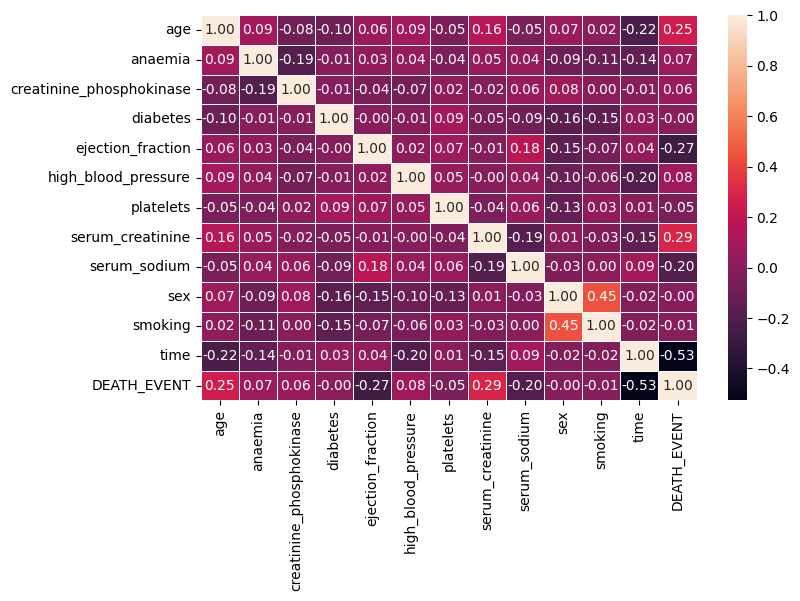

In [7]:
 f,ax=plt.subplots(figsize = (8,5))
 sns.heatmap(df.corr(), annot = True, fmt = ".2f", linewidths = .5,ax=ax)
 plt.show()


In [8]:
df.corr()["DEATH_EVENT"].abs().nlargest(10)

DEATH_EVENT                 1.000000
time                        0.526964
serum_creatinine            0.294278
ejection_fraction           0.268603
age                         0.253729
serum_sodium                0.195204
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
platelets                   0.049139
Name: DEATH_EVENT, dtype: float64

In [9]:
df["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [10]:
fig=px.histogram(df,
                 x="DEATH_EVENT",
                 color="sex",
                 hover_data=df.columns,
                 title="Sex Distribution",
                 barmode="group"
                )
fig.show()

In [11]:
fig = px.box(df, x='sex', y='age', points="all")
fig.show()

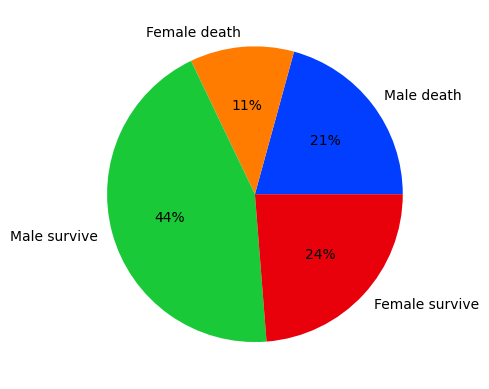

In [12]:
male = df[df["sex"]==1]
female = df[df["sex"]==0]
male_death = len(male[male["DEATH_EVENT"]==1].value_counts())
female_death = len(female[female["DEATH_EVENT"]==1].value_counts())
male_survive = len(male[male["DEATH_EVENT"]==0].value_counts())
female_survive = len(female[female["DEATH_EVENT"]==0].value_counts())
values = [male_death,female_death,male_survive,female_survive]
palette_color = sns.color_palette('bright')
plt.pie(values, labels=["Male death","Female death","Male survive","Female survive"], colors=palette_color, autopct='%.0f%%')
plt.show()

In [13]:
surv = df[df["DEATH_EVENT"]==0]["age"]
death = df[df["DEATH_EVENT"]==1]["age"]
values=(surv,death)
labels=("Survive","Death")
fig = ff.create_distplot(values, labels, bin_size=0.5)
fig.show()

In [14]:
features= ['time', 'serum_creatinine', 'ejection_fraction', 'age']
x = df[features].values
y = np.ravel(df.iloc[:,-1:].values)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [15]:
sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

Logistic Regression

In [16]:
log_r= LogisticRegression(random_state=0)
log_r.fit(X_train,y_train)
y_pred=log_r.predict(X_test)
cm_log=confusion_matrix(y_test,y_pred)
log_reg_acc=accuracy_score(y_test, y_pred)
print("accuracy of logistic regression:",log_reg_acc)

accuracy of logistic regression: 0.8181818181818182


The best cv value: 3


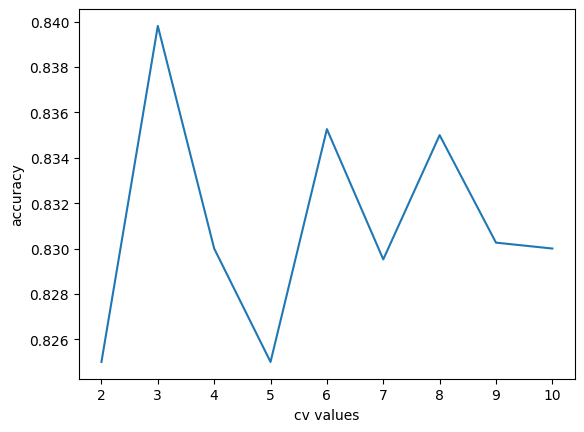

In [17]:
#cross-validation best cv value
scores = []
for cv in range(2, 11):
        log_r_set =LogisticRegression()
        accuracies = cross_val_score(estimator=log_r_set, X=X_train,y=y_train, cv=cv)
        mean_accuracy = np.mean(accuracies)
        scores.append(mean_accuracy)
best_cv = np.argmax(scores) + 2
print("The best cv value:", best_cv)

plt.plot(range(2,11),scores)
plt.xlabel("cv values")
plt.ylabel("accuracy")
plt.show()

In [18]:
accuracies = cross_val_score(log_r_set, X=X_train,y=np.ravel(y_train), cv=3)
lr_score=np.mean(accuracies)
print("Cross Validation accuracy score:", lr_score)

Cross Validation accuracy score: 0.8398160711593547


KNN

In [19]:
#best parameters
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
scores=[]

p=[{'n_neighbors':[1,2,3,4,6,5,7,8,9,10],'metric':['minkowski']}]

gs= GridSearchCV(estimator = knn,
                 param_grid=p,
                 scoring="accuracy",
                 cv=10,
                 n_jobs=-1)

grid_search = gs.fit(X_train,y_train)

best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("{}->{}".format("best score", best_score))
print("{}->{}".format("best parameters", best_parameters))

best score->0.8350000000000002
best parameters->{'metric': 'minkowski', 'n_neighbors': 3}


In [20]:
knn = KNeighborsClassifier(n_neighbors = 3, metric="minkowski")
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
cm_knn=confusion_matrix(y_test,y_pred)
knn_acc = accuracy_score(y_test, y_pred)
print("{} nn score -> {}".format(3,knn_acc))

3 nn score -> 0.7373737373737373


The best cv value: 10


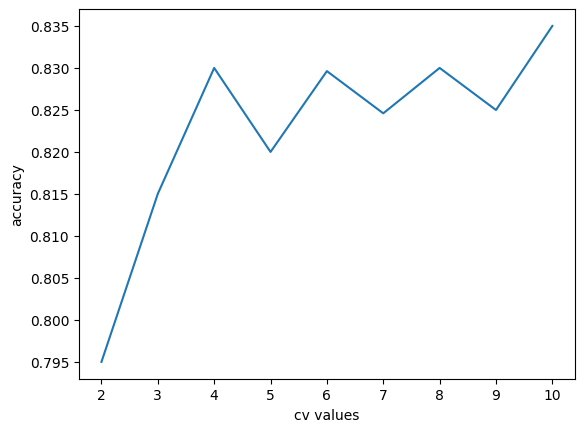

In [21]:
#cross-validation

scores = []
for cv in range(2, 11):
        knn_set = KNeighborsClassifier(n_neighbors = 3, metric="minkowski")
        accuracies = cross_val_score(estimator=knn_set, X=X_train,y=y_train, cv=cv)
        mean_accuracy = np.mean(accuracies)
        scores.append(mean_accuracy)
best_cv = np.argmax(scores) + 2
print("The best cv value:", best_cv)

plt.plot(range(2,11),scores)
plt.xlabel("cv values")
plt.ylabel("accuracy")
plt.show()

In [22]:
accuracies = cross_val_score(knn_set, X=X_train,y=y_train, cv=10)
knn_score = np.mean(accuracies)
print("cross validation accuracy score:", knn_score)

cross validation accuracy score: 0.8350000000000002


SVM classification

In [23]:
#best parameters

linear_svm=SVC(kernel="linear")
linear_svm.fit(X_train,y_train)
y_pred = linear_svm.predict(X_test)
cm_linear=confusion_matrix(y_test,y_pred)
linear_acc=accuracy_score(y_test, y_pred)
print("accuracy of linear SVC:",linear_acc)

accuracy of linear SVC: 0.8181818181818182


In [24]:
#best parameters

poly_svm=SVC(kernel="poly")
poly_svm.fit(X_train,y_train)
y_pred = poly_svm.predict(X_test)
cm_poly=confusion_matrix(y_test,y_pred)
poly_acc=accuracy_score(y_test, y_pred)
print("accuracy of poly SVC:",poly_acc)

accuracy of poly SVC: 0.7777777777777778


In [25]:
#best parameters

rbf_svm=SVC(kernel="rbf")
rbf_svm.fit(X_train,y_train)
y_pred = rbf_svm.predict(X_test)
cm_rbf=confusion_matrix(y_test,y_pred)
rbf_acc=accuracy_score(y_test, y_pred)
print("accuracy of rbf SVC:",rbf_acc)

accuracy of rbf SVC: 0.8080808080808081


The best cv value: 4


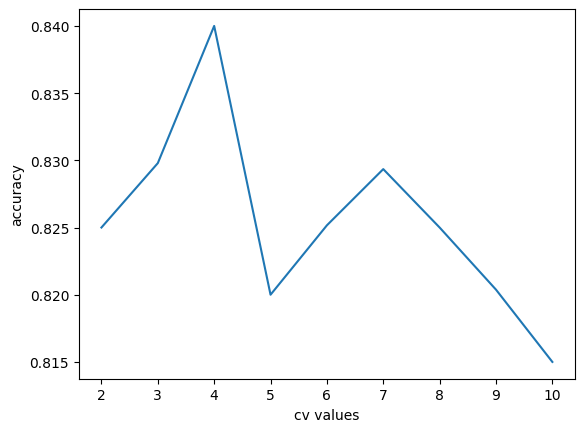

In [26]:
#cross-validation

scores = []
for cv in range(2, 11):
        linear_svm=SVC(kernel="linear")
        accuracies = cross_val_score(estimator=linear_svm, X=X_train,y=y_train, cv=cv)
        mean_accuracy = np.mean(accuracies)
        scores.append(mean_accuracy)
best_cv = np.argmax(scores) + 2
print("The best cv value:", best_cv)

plt.plot(range(2,11),scores)
plt.xlabel("cv values")
plt.ylabel("accuracy")
plt.show()

In [27]:
accuracies = cross_val_score(estimator=linear_svm, X=X_train,y=y_train, cv=4)
svc_score = np.mean(accuracies)
print("cross validation accuracy score:", svc_score)

cross validation accuracy score: 0.8400000000000001


Naiyve bias classification

In [28]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
cm_nb=confusion_matrix(y_test,y_pred)
nb_acc=accuracy_score(y_test, y_pred)
print("accuracy of naive bayes:",nb_acc)

accuracy of naive bayes: 0.8181818181818182


The best cv value: 6


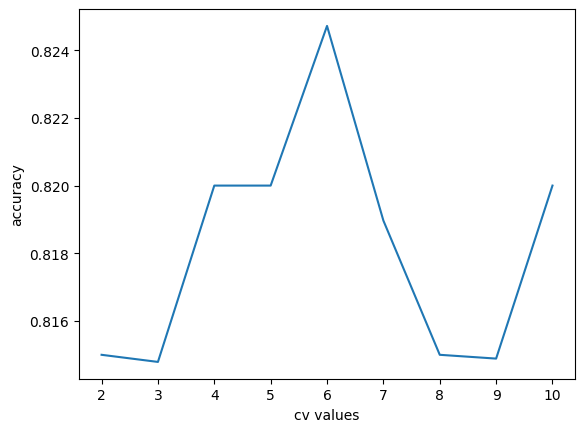

In [29]:
#cross-validation

scores = []
for cv in range(2, 11):
        nb=GaussianNB()
        accuracies = cross_val_score(estimator=nb, X=X_train,y=y_train, cv=cv)
        mean_accuracy = np.mean(accuracies)
        scores.append(mean_accuracy)
best_cv = np.argmax(scores) + 2
print("The best cv value:", best_cv)

plt.plot(range(2,11),scores)
plt.xlabel("cv values")
plt.ylabel("accuracy")
plt.show()

In [30]:
accuracies = cross_val_score(estimator=nb, X=X_train,y=y_train, cv=6)
nb_score = np.mean(accuracies)
print("cross validation accuracy score:", nb_score)

cross validation accuracy score: 0.8247177658942365


Decison tree

In [31]:
dct = DecisionTreeClassifier(criterion="entropy")
dct.fit(X_train,y_train)
y_pred = dct.predict(X_test)
cm_dct=confusion_matrix(y_test,y_pred)
dct_acc = accuracy_score(y_test, y_pred)
print('{}-> {}'.format("Accuracy of Decision Tree Classifier ",dct_acc))

Accuracy of Decision Tree Classifier -> 0.8080808080808081


The best cv value: 5


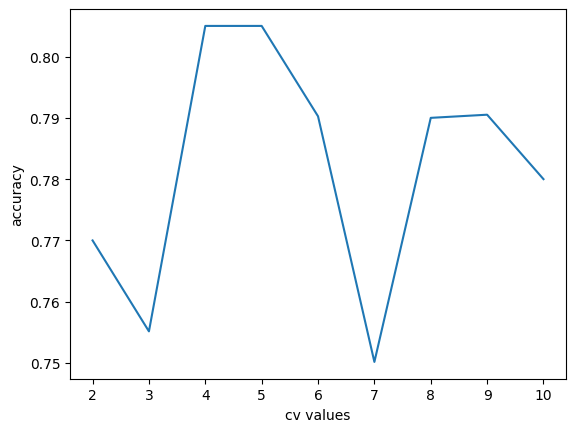

In [32]:
scores = []
for cv in range(2, 11):
        dct = DecisionTreeClassifier(criterion="entropy")
        accuracies = cross_val_score(estimator=dct, X=X_train,y=y_train, cv=cv)
        mean_accuracy = np.mean(accuracies)
        scores.append(mean_accuracy)
best_cv = np.argmax(scores) + 2
print("The best cv value:", best_cv)

plt.plot(range(2,11),scores)
plt.xlabel("cv values")
plt.ylabel("accuracy")
plt.show()

In [33]:
accuracies = cross_val_score(estimator=dct, X=X_train,y=y_train, cv=8)
dct_score = np.mean(accuracies)
print("cross validation accuracy score:", dct_score)

cross validation accuracy score: 0.81


RAndom Forest

The best n_estimators parameter is:  21


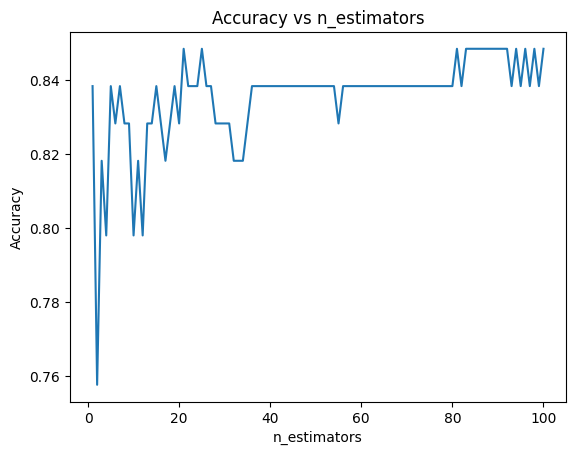

In [34]:
#best parameters

n_estimators_list = list(range(1, 101))
scores = []

for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

best_n_estimators=np.argmax(scores)+1
print("The best n_estimators parameter is: ", best_n_estimators)

plt.plot(n_estimators_list, scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs n_estimators')
plt.show()

In [35]:
rf = RandomForestClassifier(n_estimators=21, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cm_rf=confusion_matrix(y_test,y_pred)
rf_acc = accuracy_score(y_test, y_pred)
print('{}-> {}'.format("Accuracy of Random Forest Classifier ",rf_acc))

Accuracy of Random Forest Classifier -> 0.8484848484848485


The best cv value: 6


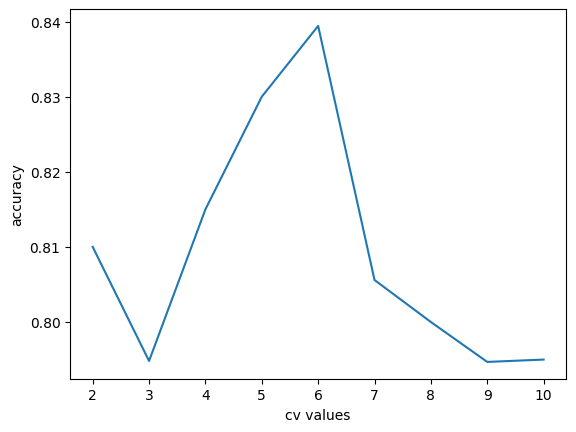

In [36]:
#cross-validation

scores = []
for cv in range(2, 11):
        rf = RandomForestClassifier(n_estimators=21, random_state=42)
        accuracies = cross_val_score(estimator=rf, X=X_train,y=y_train, cv=cv)
        mean_accuracy = np.mean(accuracies)
        scores.append(mean_accuracy)
best_cv = np.argmax(scores) + 2
print("The best cv value:", best_cv)

plt.plot(range(2,11),scores)
plt.xlabel("cv values")
plt.ylabel("accuracy")
plt.show()

In [37]:
rf = RandomForestClassifier(n_estimators=21, random_state=42)
accuracies = cross_val_score(estimator=rf, X=X_train,y=y_train, cv=6)
rf_score = np.mean(accuracies)
print("{}-> {}".format("Cross validation accuracy: ",rf_score))

Cross validation accuracy: -> 0.8394236482471777


Model Comparssion

In [38]:
accuracy_scores = [log_reg_acc,knn_acc,linear_acc,nb_acc,dct_acc,rf_acc]
cross_acc= [lr_score,knn_score,svc_score,nb_score,dct_score,rf_score]
models = ["Logistic Regression","KNN","SVC","Naive Bayes","Decision Tree","Random Forest"]

for i in range(0,6):
    print("------------")
    print(models[i])
    accuracy_scores[i] = accuracy_scores[i]*100
    cross_acc[i] = cross_acc[i]*100
    print("{}->{}".format("Accuracy Score ",accuracy_scores[i]))
    print("{}->{}".format("Cross-Validation Score ",cross_acc[i]))

------------
Logistic Regression
Accuracy Score ->81.81818181818183
Cross-Validation Score ->83.98160711593547
------------
KNN
Accuracy Score ->73.73737373737373
Cross-Validation Score ->83.50000000000001
------------
SVC
Accuracy Score ->81.81818181818183
Cross-Validation Score ->84.00000000000001
------------
Naive Bayes
Accuracy Score ->81.81818181818183
Cross-Validation Score ->82.47177658942365
------------
Decision Tree
Accuracy Score ->80.8080808080808
Cross-Validation Score ->81.0
------------
Random Forest
Accuracy Score ->84.84848484848484
Cross-Validation Score ->83.94236482471777


<Axes: >

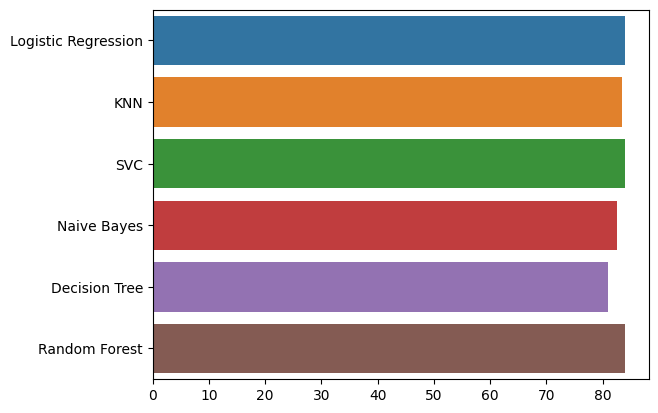

In [39]:
sns.barplot(x=cross_acc, y=models)

Confusion Matrix

Text(642.7810457516341, 0.5, 'y_true_rf')

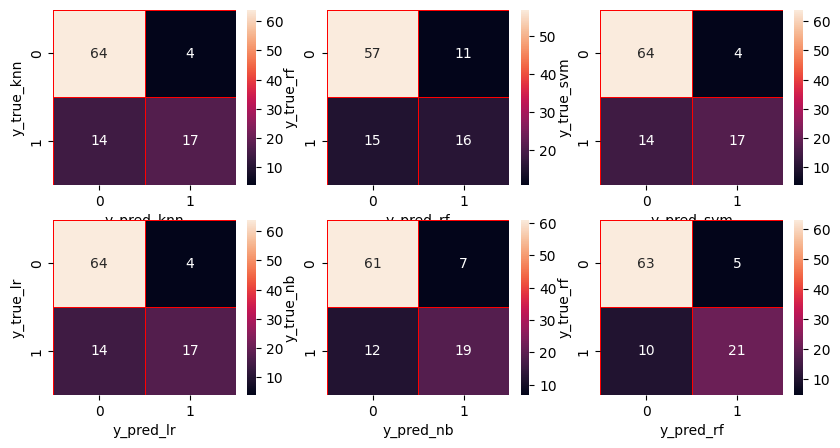

In [40]:
    fig, axes = plt.subplots(2,3, figsize=(10,5))

    sns.heatmap(cm_log, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=axes[0, 0])
    axes[0, 0].set_xlabel("y_pred_knn")
    axes[0, 0].set_ylabel("y_true_knn")

    sns.heatmap(cm_knn, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=axes[0, 1])
    axes[0, 1].set_xlabel("y_pred_rf")
    axes[0, 1].set_ylabel("y_true_rf")


    sns.heatmap(cm_linear, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=axes[0, 2])
    axes[0, 2].set_xlabel("y_pred_svm")
    axes[0, 2].set_ylabel("y_true_svm")

    sns.heatmap(cm_nb, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=axes[1, 0])
    axes[1, 0].set_xlabel("y_pred_lr")
    axes[1, 0].set_ylabel("y_true_lr")

    sns.heatmap(cm_dct, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=axes[1,1])
    axes[1,1].set_xlabel("y_pred_nb")
    axes[1,1].set_ylabel("y_true_nb")

    sns.heatmap(cm_rf, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=axes[1,2])
    axes[1,2].set_xlabel("y_pred_rf")
    axes[1,2].set_ylabel("y_true_rf")